# Import the packages that will be used

Pandas - is used to handle data objects: read files and save them into an array or dataframe, creat new columns, modify columns, filter data, etc.

In [1]:
import pandas as pd

os - here, it can be used to change the work directory, and can be used for other operations with directories like exploring and copying

In [2]:
import os

matplotlib - this package is used to create 2D plots

In [3]:
import matplotlib.pyplot as plt

numpy - can perform numerical operations, find max/min values, random generator, etc.

In [4]:
import numpy as np

seaborn - is a package that can make prettier plots than matplotlip

In [5]:
import seaborn as sns

datetime - can get the current date and time

In [6]:
import datetime

GPyOpt - is the package that I found for better control, particularly you can obtain the suggested next samples

In [7]:
import GPyOpt

math - a package with many functions

In [8]:
import math



# Website references for plotting colors
matplotlib colors https://matplotlib.org/2.0.2/api/colors_api.html

matplotlib colormaps https://matplotlib.org/users/colormaps.html

html hex colors found in https://en.wikipedia.org/wiki/Web_colors

# Configuration for plot style

In [9]:
sns.set_context("paper", font_scale=2, rc={"font.size":30,"axes.labelsize":30})
sns.set_style({'axes.linewidth': 2, 'axes.edgecolor':'black','xtick.major.width': 2,
               'ytick.major.width': 2,'xtick.labelsize':24,'ytick.labelsize':24})
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'

# Create function to be optimized

In [10]:
def f_y(x):
    return math.log(x)*math.cos(x)

# Setup the parameters for GPyOpt

The bounds list will be part of the input for GPyOpt

In [11]:
min_x = 0.1
max_x = 50
bounds = []
temp_dict = {}
temp_dict['name'] = 'x'
temp_dict['type'] = 'continuous'
temp_dict['domain'] = (min_x, max_x)
bounds.append(temp_dict)

Create dataframe with values from the function

In [12]:
df = pd.DataFrame(data = np.arange(min_x, max_x, 0.5), columns=['x'])
df['y'] = df.apply(lambda row: f_y(row), axis=1)

Let's see the function

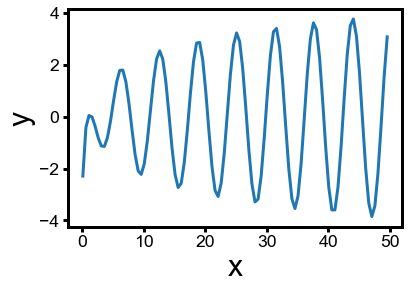

In [13]:
sns.lineplot(data=df, x='x', y='y')

# Create the GPyOpt model

### evaluator_type='random'

Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!


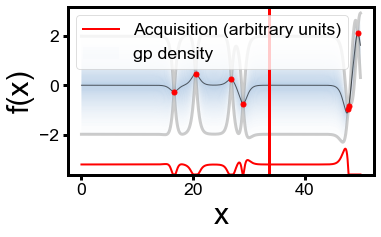

In [14]:
model = GPyOpt.models.GPModel()
acq = GPyOpt.acquisitions.AcquisitionMPI(model, space= bounds)
optimizer = GPyOpt.methods.BayesianOptimization(f= f_y, domain = bounds, acquiition= acq, 
                                                  evaluator_type='random',
                                                  batch_size=2,
                                                  normalize_Y=True)
optimizer.run_optimization(max_iter=1)
optimizer.plot_acquisition()

Get the optimal position

Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!


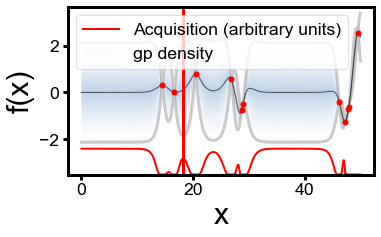

In [15]:
optimizer.run_optimization(max_iter=2)
optimizer.plot_acquisition()

Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!


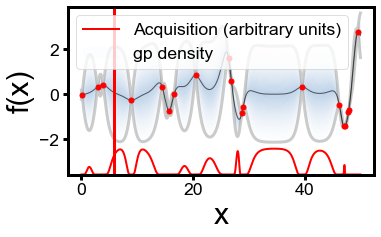

(-3.8213456328270716, array([47.00143195]))

In [16]:
optimizer.run_optimization(max_iter=4)
optimizer.plot_acquisition()
optimizer.fx_opt, optimizer.x_opt

## evaluator_type='thompson_sampling'

Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!


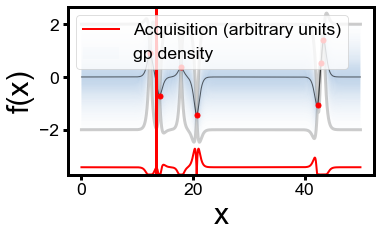

In [18]:
model = GPyOpt.models.GPModel()
acq = GPyOpt.acquisitions.AcquisitionMPI(model, space= bounds)
optimizer = GPyOpt.methods.BayesianOptimization(f= f_y, domain = bounds, acquiition= acq, 
                                                  evaluator_type='thompson_sampling',
                                                  batch_size=2,
                                                  normalize_Y=True)
optimizer.run_optimization(max_iter=1)
optimizer.plot_acquisition()

Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!


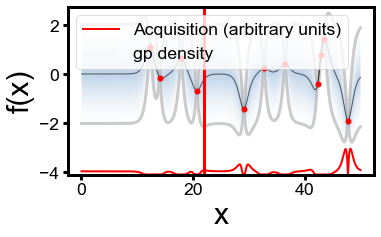

In [19]:
optimizer.run_optimization(max_iter=2)
optimizer.plot_acquisition()

Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!


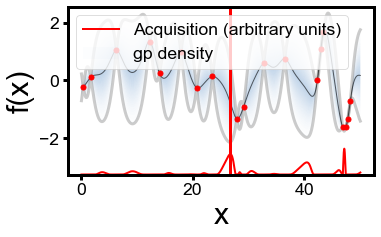

(-3.7274997939014956, array([47.38502531]))

In [20]:
optimizer.run_optimization(max_iter=4)
optimizer.plot_acquisition()
optimizer.fx_opt, optimizer.x_opt

## evaluator_type='sequential'

Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!


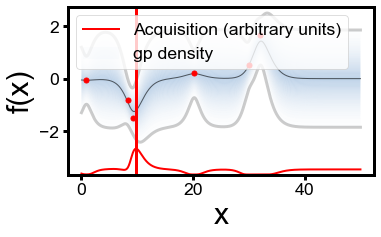

In [21]:
model = GPyOpt.models.GPModel()
acq = GPyOpt.acquisitions.AcquisitionMPI(model, space= bounds)
optimizer = GPyOpt.methods.BayesianOptimization(f= f_y, domain = bounds, acquiition= acq, 
                                                  evaluator_type='sequential',
                                                  batch_size=2,
                                                  normalize_Y=True)
optimizer.run_optimization(max_iter=1)
optimizer.plot_acquisition()

Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!


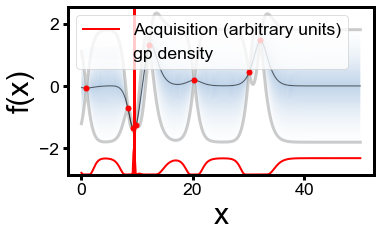

In [22]:
optimizer.run_optimization(max_iter=2)
optimizer.plot_acquisition()

Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!


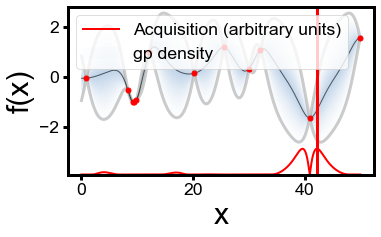

(-3.6960428615978524, array([40.93329827]))

In [23]:
optimizer.run_optimization(max_iter=4)
optimizer.plot_acquisition()
optimizer.fx_opt, optimizer.x_opt

## evaluator_type='local_penalization'

Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!


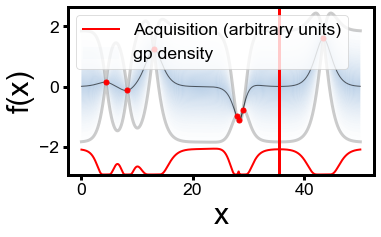

In [24]:
model = GPyOpt.models.GPModel()
acq = GPyOpt.acquisitions.AcquisitionMPI(model, space= bounds)
optimizer = GPyOpt.methods.BayesianOptimization(f= f_y, domain = bounds, acquiition= acq, 
                                                  evaluator_type='local_penalization',
                                                  batch_size=2,
                                                  normalize_Y=True)
optimizer.run_optimization(max_iter=1)
optimizer.plot_acquisition()

Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!


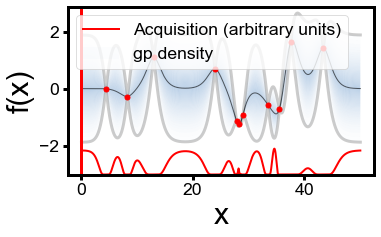

In [25]:
optimizer.run_optimization(max_iter=2)
optimizer.plot_acquisition()

Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!
Error in parallel computation. Fall back to single process!


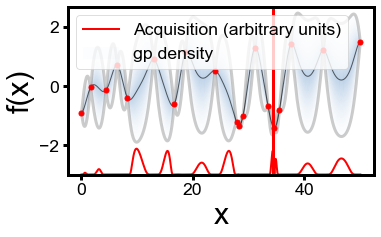

(-3.5383316888979484, array([34.61557905]))

In [26]:
optimizer.run_optimization(max_iter=4)
optimizer.plot_acquisition()
optimizer.fx_opt, optimizer.x_opt